| 주차 | 일정                               | 페이지                                  |
|-----:|-----------------------------------|----------------------------------------|
|    1 | 1장-헬로 파이썬                     | 0p ~ 45p                               |
|    2 | 2장-퍼셉트론                        | 46p ~ 62p                              |
|    3 | 3장-신경망                          | 63p ~ 105p                             |
|    4 | 4장-신경망 학습                     | 106p ~ 146p                            |
|    5 | 5장-오차역전파법                    | 147p ~ 187p (+ Appendix A, 292p ~ 299p) |
|    6 | 중간고사(전)                        |                                        |
|    7 | 중간고사                           |                                        |
|    8 | 6장-학습 관련 기술들               | 188p ~ 226p                            |
|    9 | 7장-합성곱 신경망(CNN)             | 227p ~ 259p                            |
|   10 | 딥러닝                             | 261p ~ 308p                            |
|   11 | 1장-신경망 복습                    | 0p ~ 74p (+ Appendix A, 389p ~ 394p)  |
|   12 | 2장-자연어와 단어의 분산 표현      | 78p ~ 113p (+ Appendix B, 395p ~ 399p) |
|   13 | 기말고사(전)                       |                                        |
|   14 | 기말고사                          |                                        |
|   15 | 3장-word2vec                       | 114p ~ 147p                            |
|   16 | 4장-word2vec 속도 개선             | 148p ~ 189p                            |
|   17 | 5장-순환신경망(RNN)                | 190p ~ 235p                            |
|   18 | 6장-게이트가 추가된 RNN            | 263p ~ 286p (+ Appendix C, 401p ~ 402p)|
|   19 | 7장-RNN을 사용한 문장 생성         | 287p ~ 333p                            |
|   20 | 8장-어텐션                         | 334p ~ 387p                            |

# 12주차

자연어와 단어의 분산 표현현

_78~113p_

---

### 자연어 처리란...

딱딱한 컴퓨터 언어가 아니라 사람들이 쓰고 말하는 언어


**단어의 의미**

말 < 단어 < 문자

단어들부터 의미의 최소 단위가 된다, 그래서 단어의 의미를 처음 알아내는 것이 가장 중요하다.

### Thesaurus (`/θɪˈsɔːr.əs/`, thee*써*러스)

쉽게 말하면 뜻이 "비슷한" 단어들로 그룹이 되어 분류. 또, 상위/하위그룹 및 반의어 등도 포함이 되어있음.

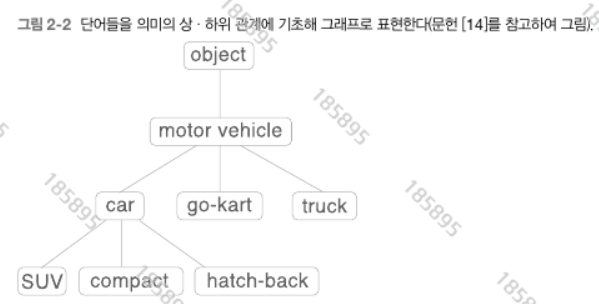

이런 단어들의 유의어 집합들을 만든 다음 이 단어 네트워크를 통해 단어의 관계를 컴퓨터에게도 표현이 가능!

https://neal.fun/infinite-craft/

**WordNet**

자연어 처리 부문에서 가장 오래되고 공신력있는 thesaurus, 지금까지 여러 자연어 처리 애플리케이션에 사용됨. 단어들의 "의미론적" 관계에 따라, 노드/링크 형태로 무수히 많이 연결이 되어있다. (약 15만개의 단어들들)

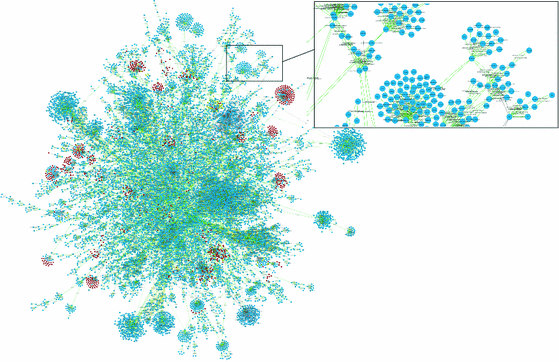

하지만, (이건 thesaurus 전반의 문제이기는 한) 이런 방식의 문제점이 있는데, 신조어등과같이 등제가 안된 단어들에 대하여는 적응을 할 수 없다. 사람들이 이걸 다 일일이 labeling을 매일같이 할수도 없고  현식적으로 어렵다. 문제점들을 정리하자면:

- 시대 변화에 적응이 어려움
- 사람의 손이 많이 간다
- 단어의 미묘한 차이를 표현 못함

위 문제들을 해결하기 위해 '통계 기반 기법', '추론 기반 기법'이 등장을 함.

### 통계 기반 기법

**Corpus/말뭉치란?**: 구조가 있는 다량의 텍스트, 단어 하나나 문자 하나는 Corpus라고 할 수 없다. 물론 또한 사람이 적은 어떤 정보가 들어있어야한다는 점도 있다.

이제 예시 Corpus를 전처리해본다면...

In [3]:
text = 'you say goodby and I say hello.'
text = text.lower().replace('.', ' .')
text

'you say goodby and i say hello .'

In [4]:
words = text.split()
words

['you', 'say', 'goodby', 'and', 'i', 'say', 'hello', '.']

단어들을 사용하기 쉽도록 ID 를 부여해본다, 이를 위해 대응표/translation table을 짜보겠다. (ID <-> 단어 쌍방)

In [5]:
w2i, i2w = {}, {}

for word in words:
    if word not in w2i:
        new_id = len(w2i)
        w2i[word] = new_id
        i2w[new_id] = word

w2i, i2w

({'you': 0, 'say': 1, 'goodby': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6},
 {0: 'you', 1: 'say', 2: 'goodby', 3: 'and', 4: 'i', 5: 'hello', 6: '.'})

이걸 사용하면, '인코딩' 및 '디코딩'이 가능하게 된다!

In [6]:
test_words = ['i', 'say', 'hello', '.']

test_id_encode = [w2i[w] for w in test_words]
print(test_id_encode)  # 인코딩

test_id_decode = [i2w[i] for i in test_id_encode]
print(' '.join(test_id_decode))  # 다시 디코딩

[4, 1, 5, 6]
i say hello .


한대로 다 뭉쳐서 `preprocess`함수 제작

In [7]:
import numpy as np

def preprocess(text: str) -> tuple[np.ndarray, dict, dict]:  
    words = text.lower().replace('.', ' .').split()
    w2i, i2w = {}, {}

    for word in words:
        if word not in w2i:
            new_id = len(w2i)
            w2i[word] = new_id
            i2w[new_id] = word
    
    corpus = np.array([w2i[w] for w in words])

    return corpus, w2i, i2w

### 분산표현 distributional representation

예를 들자면 색을 3원색 RGB의 3개 벡터로 표연하듯이, 단어도 여러 벡터로 "분산 표현"을 할 수 있다.

여기서 나온 가설 중 하나가 "단어의 의미는 주변 단어에 의해 형성된다"라는 **분포 가설**이다. 
- 단어 자체로서는 의미가 없다
- 단어가 사용된 맥락에서 의미가 나온다
- 의미가 비슷한/같은 단어들은 같은 맥락에서 많이 쓰인다

EX:
>I *drink* <u>beer</u><br>
>We *drink* <u>wine</u>

drink 주변에는 음료가 나옴

>I *guzzle* <u>beer</u><br>
>We *guzzle* <u>wine</u>

guzzle또한 drink와 같은 자리에 쓰일 수 있음. 즉, guzzle과 drink는 비슷한 뜻을 가지고 있다.

주변 단어와의 "맥락"을 확인하기 위해 widnow size응 정해서 타겟 단어의 좌우로 window size만큼 탐색해서 맥락으로 이용한다. Window size가 1이면 좌우 1개, 2이면 좌우로 2개씩 찾아내는 형태이다.

아래의 예시는 context window size가 2일 경우이다.

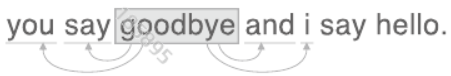

#### 동시발생 행렬

앞서 언급한 window안에 들어간 단어들끼리 서로 얼마나 "같이 나오냐"를 표현하기 위한 방법 중 하나로, 통계에서 흔히 쓰는 confusion matrix 모양으로 쓸 수 있다.

"you say goodybye and i say hello"를 window size 1인 가정 하에 돌려본다면, 다음과 같을 것이다.

|         | you | say | goodbye | and | i | hello | . |
|---------|-----|-----|---------|-----|---|--------|---|
| **you**     | 0   | 1   | 0       | 0   | 0 | 0      | 0 |
| **say**     | 1   | 0   | 1       | 0   | 1 | 1      | 0 |
| **goodbye** | 0   | 1   | 0       | 1   | 0 | 0      | 0 |
| **and**     | 0   | 0   | 1       | 0   | 1 | 0      | 0 |
| **i**       | 0   | 1   | 0       | 1   | 0 | 0      | 0 |
| **hello**   | 0   | 1   | 0       | 0   | 0 | 0      | 1 |
| **.**       | 0   | 0   | 0       | 0   | 0 | 1      | 0 |


위와 같은 matrix를 co-occurence matrix라고 한다.

이를 만들 수 있는 함수를 만든다면 다음과 같다.

In [17]:
def create_co_matrix(corpus: np.ndarray, vocab_size: int, window_size: int = 1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - 1
            right_idx = idx + 1

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1
    
    return co_matrix

In [18]:
corpus, _, _ = preprocess('You say goodbye and I say hello.')
create_co_matrix(corpus, len(set(corpus)))

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]], dtype=int32)

#### 벡터간의 유사도

벡터의 유사도 측정방법은...
- 벡터의 내적
- 맨하탄 거리 (L1 norm)

    $\|x - y\|_{1} = \sum_{i=1}^{n} \bigl|x_{i} - y_{i}\bigr|$

- 유클리드 거리 (L2 norm)

    $\|x - y\|_{2} = \sqrt{\sum_{i=1}^{n} \bigl(x_{i} - y_{i}\bigr)^{2}}$

- 등등 있음...

단어벡터의 유사도를 측정할때는 고사인 유사도를 사용하는데 공식은 아래와 같음.

$$
\mathrm{cosine\_similarity}(x, y)
= \frac{\displaystyle\sum_{i=1}^{n} x_{i}\,y_{i}}
         {\displaystyle\sqrt{\sum_{i=1}^{n} x_{i}^{2}}\;\sqrt{\sum_{i=1}^{n} y_{i}^{2}}}
$$

분자에는 벡터들의 내적, 분모는 각 벡터의 L2노름(유클리드 거리)이 사용됨을 볼 수 있다.
그러니 사실상 코사인 유사도 구하는 핵심은 L2 norm을 구하고 내적을 구하는 것이다.

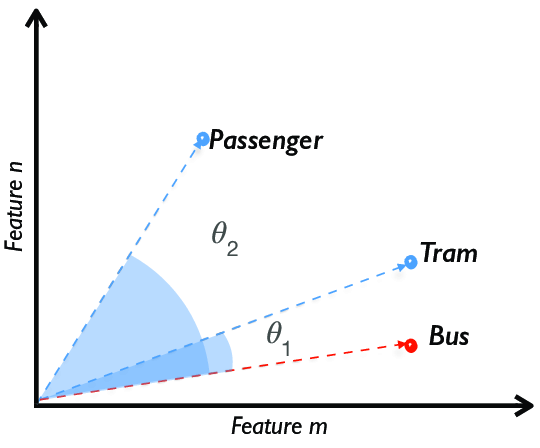

어떻게 생겼을지 확인한다면 feature가 축이되고 그 feature를 얼마나 한 단어가 의미하는지에 따라 그 word vector가 가르키게 된다.

-1 ~ 1의 범위로 값이 나온다
- 1: 완벽 일치
- 0: 90도 (orthogonal)
- -1: 180도 정반대

전에 만든 co-occurance matrix의 관점에서 보면 matrix의 한 행이나 열을 골라서 벡터를 생성하니, corpus에서 나온 vocab size만큼의 차원이 있다고 보면 됨.

이제, 파이썬 함수로 구현을 해보면 다음과 같다.

In [22]:
def cos_similarity(x, y, eps=1e-8):
    nx = x / (np.sqrt(np.sum(x ** 2)) + eps)
    ny = y / (np.sqrt(np.sum(y ** 2)) + eps)
    return np.dot(nx, ny)

앞서 사용했던 예시로 similarity 구해본다면...

In [23]:
corpus, w2i, i2w = preprocess('You say goodbye and I say hello.')
cm = create_co_matrix(corpus, len(set(corpus)))

c0 = cm[w2i['you']]
c1 = cm[w2i['i']]
print(cos_similarity(c0, c1))

0.7071067691154799


다음은 단어를 받으면 corpus안에 있는 단어중 가장 유사한것들을 내림차순으로 나열해주는 함수!

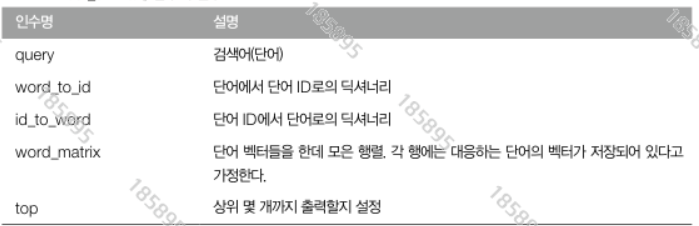

In [25]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):
    '''유사 단어 검색
    :param query: 쿼리(텍스트)
    :param word_to_id: 단어에서 단어 ID로 변환하는 딕셔너리
    :param id_to_word: 단어 ID에서 단어로 변환하는 딕셔너리
    :param word_matrix: 단어 벡터를 정리한 행렬. 각 행에 해당 단어 벡터가 저장되어 있다고 가정한다.
    :param top: 상위 몇 개까지 출력할 지 지정
    '''
    # 1) 검색어를 꺼낸다.
    if query not in word_to_id:
        print(f'{query}(을)를 찾을 수 없습니다.')
        return 
    
    print(f'\n[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    # 2) 코사인 유사도 계산
    vocab_size = len(id_to_word)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i], query_vec)
        
    # 3) 코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    for i in (-1 * similarity).argsort():
        if id_to_word[i] == query:
            continue
        print(f' {id_to_word[i]}: {similarity[i]}')
        
        count +=1
        if count >= top:
            return

앞서 했던거 다시 집어넣어보면...

In [26]:
most_similar('you', w2i, i2w, cm, )


[query] you
 goodbye: 0.7071067691154799
 hello: 0.7071067691154799
 i: 0.7071067691154799
 and: 0.0
 say: 0.0


note: corpus data가 아직은 작아서 결과가 좀 미흡하게 보일 수 있다.

### 통계 기반 기법 개선하기

동시발생 행렬의 원소는 동시에 단어가 나온 횟수를 측정하므로 고빈도 단어가 있으면 그렇게 좋은 metric이 될 수가 없다. 

'the'같은 단어들이 많이 나오니 어떤 단어가 이 단어와 비슷하다고 생각해도 the가 훨씬 더 많이 나오므로 the가 항상 유사도가 더 넢게 나오게 된다.

이를 해결하기 위해 "점별 상호정보량 (PMI)"를 사용한다. 확률변수 x, y에 따라 다음 식으로 정의:

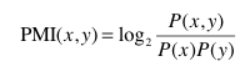

(값이 클수록 연관성이 큼) 함수 안에 각 단어가 등장하는 순수확률을 추가하므로서 너무 많이 등장하면 일종의 페널티를 부과하는 식으로 식이 구성이 되어있다.

식 안에 $P(x, y)$인 확률로 들어가있으므로, co-matrix에서 따와서 식을 만들어본다면 다음과 같다.

$$
\text{PMI}(x, y) = \log_2 \frac{P(x, y)}{P(x)P(y)} 
= \log_2 \frac{C(x, y) / N}{(C(x)/N)(C(y)/N)} 
= \log_2 \frac{C(x, y) \cdot N}{C(x) C(y)}
$$

실제로 사용한다면 x, y는 corpus에 등장하는 단어들일 것이다.

하지만 이 식의 문제가 둘 중 하나가 등장을 안하는 단어 $P = 0$ 인 경우에는 출력값이 $-\infty = \log_2{0}$이 되어버리므로 음수 진입하면 0으로 cap을 걸어둔 PPMI(Positive PMI)를 보통 우리는 사용한다.

이 PPMI를 구현한다면 다음과 같다.

In [27]:
def ppmi(C, verbose=False, eps=1e-8):
    '''PPMI(점별 상호정보량) 생성
    :param C: 동시발생 행렬
    :param verbose: 진행 상황을 출력할지 여부
    :return: ppmi
    '''
    M = np.zeros_like(C, dtype=np.float32)
    N = np.sum(C)  # num of corpus
    S = np.sum(C, axis=0)  # 각 단어의 출현 횟수
    total = C.shape[0] * C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i, j] * N / (S[i]*S[j]) + eps)
            M[i, j] = max(0, pmi)
            
            if verbose:
                cnt += 1
                if cnt % (total//100) == 0:
                    print(f'{(100*cnt/total):.2f} 완료')
    return M

전에 썼던거 다시 집어넣어보면...

In [34]:
W = ppmi(cm)
print(cm)
print('\n' + '='*25 + '\n')
print(W)

[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]


[[0.        1.8073549 0.        0.        0.        0.        0.       ]
 [1.8073549 0.        0.8073549 0.        0.8073549 0.8073549 0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.        1.8073549 0.        1.8073549 0.        0.       ]
 [0.        0.8073549 0.        1.8073549 0.        0.        0.       ]
 [0.        0.8073549 0.        0.        0.        0.        2.807355 ]
 [0.        0.        0.        0.        0.        2.807355  0.       ]]


지금까지 언급했던 문제들은 다 해결한 것 같은데...

다른문제가 있다고 한다면, unique한 단어들이 엄청 많은 corpus를 쓸경우에는 vector크기가 말도 안되게 커진다는 점 (matrix도 그렇고)

대부분의 정보가 또 '0'인 매우 sparse한 data임을 볼 수 있다.

이를 보완하기 위해 '차원 감소'를 진행한다. 물론, 중요한 정보는 보존하면서.

책에서는 SVD - Singular Value Decomp.을 사용한다.

